In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# Load test dataset
X_test_path = "/media/tairo/Storages/DataSetAnimals/.npy format/X_test.npy"
y_test_path = "/media/tairo/Storages/DataSetAnimals/.npy format/y_test.npy"

In [8]:
X_test = np.load(X_test_path)
y_test = np.load(y_test_path)

In [9]:

# Convert labels to class indices (if needed)
num_classes = len(np.unique(y_test))  # Get number of classes
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes)  # Ensure categorical labelsb

In [10]:
# Load trained model
model_path = "VGG16(1).keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1741703141.358380  292200 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1986 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [11]:
# Make predictions
y_pred_probs = model.predict(X_test)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

I0000 00:00:1741703142.590024  293042 service.cc:148] XLA service 0x710b8000ccf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741703142.590052  293042 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-11 21:25:42.597734: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741703142.663377  293042 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-11 21:25:43.017243: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_219', 8 bytes spill stores, 8 bytes spill loads

2025-03-11 21:25:44.362609: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 800.14MiB with freed_by_count=0. The calle

 1/10 ━━━━━━━━━━━━━━━━━━━━ 2:09 14s/step

I0000 00:00:1741703156.610914  293042 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step 


In [12]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


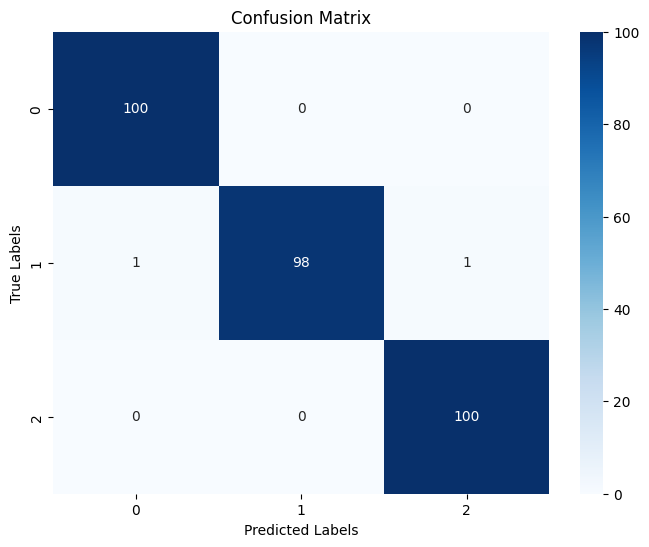

In [13]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Print classification report (includes Precision, Recall, and F1-score)
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0     0.9901    1.0000    0.9950       100
           1     1.0000    0.9800    0.9899       100
           2     0.9901    1.0000    0.9950       100

    accuracy                         0.9933       300
   macro avg     0.9934    0.9933    0.9933       300
weighted avg     0.9934    0.9933    0.9933       300

